<a href="https://colab.research.google.com/github/ArchXOX/Surviving-the-App-pocalypse/blob/main/Surviving_the_App_pocalypse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install --upgrade pandas

In [ ]:
!pip install lifelines

In [ ]:
%cd /content/drive/MyDrive/Statistics with Python - From Descriptive Statistics/Statistics with Python (2)/Statistics with Python/Regression Analysis/Capstone Project_ Surviving the App-pocalypse

/content/drive/MyDrive/Statistics with Python - From Descriptive Statistics/Statistics with Python (2)/Statistics with Python/Regression Analysis/Capstone Project_ Surviving the App-pocalypse


**LIBRARIES AND DATA**

In [ ]:
# Main Libraries
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.utils import concordance_index
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# Load the data
df = pd.read_csv("googleplaystore.csv")

# Display the first few rows to ensure it's loaded correctly
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**DATA CLEANING**

In [ ]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#Dropping the first variable
df = df.iloc[:, 1:]    #Selecting all rows and columns from the second column(index 1) to the last column therfore excluding the first column(index 0)
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Category variable
df.Category.value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

The last value, which is an integer needs to be removed.

In [ ]:
#Removing the unique value
df=df[df['Category']!='1.9']

In [ ]:
#Converting 'Reviews' variable from 'object' to 'numeric'
df['Reviews']=pd.to_numeric(df['Reviews'])

<ipython-input-71-0ceb1a3a1d8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reviews']=pd.to_numeric(df['Reviews'])


In [ ]:
#Function to convert Size to numerical value (in megabytes)
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1000
    elif size == 'Varies with device':
        return np.nan
    else:
        return size

# Apply the conversion function to the "Size" column
df['Size'] = df['Size'].apply(convert_size)

# Optionally, you might want to handle missing values (e.g., fill with mean)
df['Size'] = df['Size'].fillna(df['Size'].mean())

<ipython-input-72-ecf2930bd4e1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Size'].apply(convert_size)
<ipython-input-72-ecf2930bd4e1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Size'].fillna(df['Size'].mean())


In [ ]:
#'Installs' variable
df.Installs.value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [ ]:
#Removing '+' and ',' from the 'Installs' variable
df['Installs'] = df['Installs'].astype(str)
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

In [ ]:
#'Type' variable
df.Type.value_counts()

Type
Free    10039
Paid      800
Name: count, dtype: int64

In [ ]:
#'Price' variable
df.Price.value_counts()

Price
0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: count, Length: 92, dtype: int64

In [ ]:
#Converting 'Price' to float and removing the dollar sign
df['Price']=df['Price'].str.replace('$', '', regex=False).astype(float)

In [ ]:
#'Content rating' variable
df['Content Rating'].value_counts()

Content Rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [ ]:
#Removing the last 2 categories as they have very small values

categories_to_remove = ['Adults only 18+', 'Unrated']

#Keeping only the rows that don't have the above categories
df=df[~df['Content Rating'].isin(categories_to_remove)]

#Verify
df['Content Rating'].value_counts()

Content Rating
Everyone        8714
Teen            1208
Mature 17+       499
Everyone 10+     414
Name: count, dtype: int64

In [ ]:
#Final df without 'Genres', 'Current ver' and 'Android ver'
df_select=df.drop(columns=['Genres', 'Current Ver', 'Android Ver'])
df_select.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,"January 7, 2018"
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,"January 15, 2018"
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,"August 1, 2018"
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,"June 8, 2018"
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,"June 20, 2018"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10835 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10835 non-null  object 
 1   Rating          9362 non-null   float64
 2   Reviews         10835 non-null  int64  
 3   Size            10835 non-null  float64
 4   Installs        10835 non-null  int64  
 5   Type            10834 non-null  object 
 6   Price           10835 non-null  float64
 7   Content Rating  10835 non-null  object 
 8   Genres          10835 non-null  object 
 9   Last Updated    10835 non-null  object 
 10  Current Ver     10827 non-null  object 
 11  Android Ver     10833 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 1.3+ MB


**DEPENDENT VARIABLE**

In [ ]:
#App churn is when the app has not been updated for months
df_select['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10835, dtype: object

In [ ]:
#Convert 'Last Updated' to datetime
df_select['Last Updated'] = pd.to_datetime(df_select['Last Updated'])

#Getting the maximum date
max_date = df_select['Last Updated'].max()

#Calculate the date 6 months before the maximum date
threshold_date = max_date - pd.DateOffset(months=6)

#Create a churn variable, 1 if the last update was before the threshold date and 0 otherwise
df_select['churn'] = (df_select['Last Updated']<threshold_date).astype(int)

#Displaying the columns for verification
df_select[['Last Updated', 'churn']].head()

,Last Updated,churn
0,2018-01-07,1
1,2018-01-15,1
2,2018-08-01,0
3,2018-06-08,0
4,2018-06-20,0


In [ ]:
#Mean of churn
df_select.churn.mean()

0.3571758191047531

36% of the apps have not been updated in the last 6 months.

In [ ]:
#Creating a new variable with the duration in days since the last update compared to the max date
df_select['days_since_last_update'] = (max_date - df_select['Last Updated']).dt.days

#Displaying
df_select[['Last Updated', 'days_since_last_update']].head()

,Last Updated,days_since_last_update
0,2018-01-07,213
1,2018-01-15,205
2,2018-08-01,7
3,2018-06-08,61
4,2018-06-20,49


In [ ]:
#Df
df_select.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,churn,days_since_last_update
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,2018-01-07,1,213
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,1,205
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,2018-08-01,0,7
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,2018-06-08,0,61
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,2018-06-20,0,49


In [ ]:
#Removing 'Last Updated' variable
df_final=df_select.drop(columns=['Last Updated'])
df_final.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,churn,days_since_last_update
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,1,213
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,1,205
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,0,7
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,0,61
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,0,49


**KME COMPARING FREE VS PAID APPS**

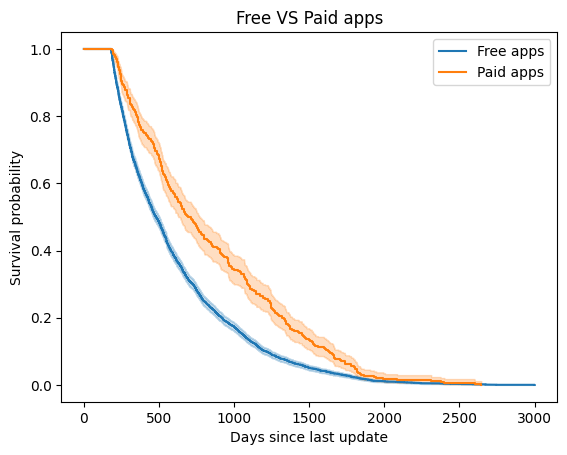

In [ ]:
#Kaplan Meier Fitter
kmf=KaplanMeierFitter()

#Splitting the data into free and paid apps
free_apps=df_final[df_final['Type']=='Free']
paid_apps=df_final[df_final['Type']=='Paid']

#Fit the estimator to the free apps
kmf.fit(free_apps['days_since_last_update'], event_observed=free_apps['churn'], label='Free apps')
ax=kmf.plot()

#Fit the estimator to the paid apps
kmf.fit(paid_apps['days_since_last_update'], event_observed=paid_apps['churn'], label='Paid apps')
kmf.plot(ax=ax)

plt.title('Free VS Paid apps')
plt.xlabel('Days since last update')
plt.ylabel('Survival probability')
plt.show()

**COX MODEL - CREATION AND ASSESSMENT**

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10835 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                10835 non-null  object 
 1   Rating                  9362 non-null   float64
 2   Reviews                 10835 non-null  int64  
 3   Size                    10835 non-null  float64
 4   Installs                10835 non-null  int64  
 5   Type                    10834 non-null  object 
 6   Price                   10835 non-null  float64
 7   Content Rating          10835 non-null  object 
 8   churn                   10835 non-null  int64  
 9   days_since_last_update  10835 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.2+ MB


The count of values in the 'Rating' category is less compared to others, which shows that there are apps that have not recieved any ratings i.e. NaN values.

In [ ]:
#Removing NaN
df_final=df_final.dropna()

In [ ]:
#Transforming categorical variables into dummy variables
df_final_dummies = pd.get_dummies(df_final, columns=['Category', 'Type', 'Content Rating'], drop_first=True)

#Splitting into training and test sets
train, test = train_test_split(df_final_dummies, test_size=0.2, random_state=1502)

#Instance of CPH fitter
cph=CoxPHFitter()

#Fitting the CPH model to the training dataset
cph.fit(train, duration_col='days_since_last_update', event_col='churn')

#Summary statistics
cph.print_summary()

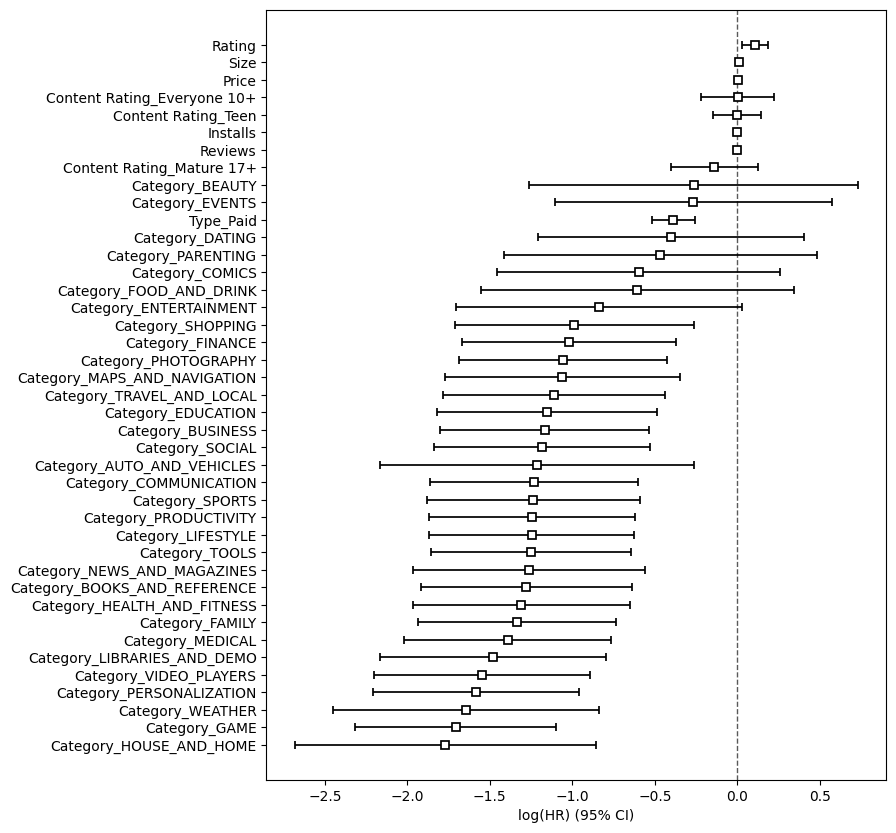

In [ ]:
#Plotting the coefficients
plt.figure(figsize=(8,10))
cph.plot()
plt.show()

In [ ]:
#Assessing model on the test set using Concordance Index
c_index = concordance_index(test['days_since_last_update'], -cph.predict_partial_hazard(test), test['churn'])
print(f"C-index is : {c_index}")

C-index is : 0.6004358495933195


In [ ]:
#Checking the proportional hazards assumptions
cph.check_assumptions(train)

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 7489 total observations, 4969 right-censored observations>
         test_name = proportional_hazard_test

---
                                   test_statistic      p  -log2(p)
Category_AUTO_AND_VEHICLES   km              0.17   0.68      0.55
                             rank            0.17   0.68      0.55
Category_BEAUTY              km              0.25   0.61      0.70
                             rank            0.25   0.62      0.70
Category_BOOKS_AND_REFERENCE km              0.16   0.69      0.54
                             rank            0.16   0.69      0.53
Category_BUSINESS            km              0.81   0.37      1.44
                             rank            0.81   0.37      1.44
Category_COMICS              km              0.47   0.49      1.02
                             rank            0.47   0.49      1.02
Category_COMMUNICATION       km              0.33   0.57      0.82
                             rank            0.33   0.57      0.81
Category_DATING              km              0.07   0.80      0.33
                             rank            0.07   0.80      0.33
Category_EDUCATION           km              0.82   0.36      1.45
                             rank            0.82   0.37      1.45
Category_ENTERTAINMENT       km              3.32   0.07      3.87
                             rank            3.35   0.07      3.90
Category_EVENTS              km              0.02   0.88      0.19
                             rank            0.02   0.88      0.19
Category_FAMILY              km              0.67   0.41      1.27
                             rank            0.67   0.41      1.27
Category_FINANCE             km              2.81   0.09      3.42
                             rank            2.81   0.09      3.41
Category_FOOD_AND_DRINK      km              0.02   0.90      0.15
                             rank            0.02   0.90      0.16
Category_GAME                km              0.75   0.39      1.37
                             rank            0.75   0.39      1.37
Category_HEALTH_AND_FITNESS  km              2.26   0.13      2.91
                             rank            2.26   0.13      2.91
Category_HOUSE_AND_HOME      km              0.20   0.66      0.61
                             rank            0.20   0.66      0.61
Category_LIBRARIES_AND_DEMO  km              0.00   0.99      0.01
                             rank            0.00   0.97      0.04
Category_LIFESTYLE           km              0.19   0.66      0.60
                             rank            0.19   0.66      0.59
Category_MAPS_AND_NAVIGATION km              2.94   0.09      3.53
                             rank            2.94   0.09      3.53
Category_MEDICAL             km              1.79   0.18      2.47
                             rank            1.79   0.18      2.47
Category_NEWS_AND_MAGAZINES  km              0.00   0.98      0.03
                             rank            0.00   0.98      0.03
Category_PARENTING           km              0.01   0.93      0.11
                             rank            0.01   0.93      0.11
Category_PERSONALIZATION     km              0.01   0.92      0.11
                             rank            0.01   0.92      0.11
Category_PHOTOGRAPHY         km              0.35   0.56      0.85
                             rank            0.35   0.56      0.85
Category_PRODUCTIVITY        km              0.47   0.49      1.02
                             rank            0.47   0.49      1.03
Category_SHOPPING            km              2.66   0.10      3.28
                             rank            2.67   0.10      3.29
Category_SOCIAL              km              0.34   0.56      0.84
                             rank            0.35   0.56      0.85
Category_SPORTS              km     



1. Variable 'Size' failed the non-proportional test: p-value is 0.0007.

   Advice 1: the functional form of the variable 'Size' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'Size' using pd.cut, and then specify it in `strata=['Size',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'Installs' failed the non-proportional test: p-value is 0.0048.

   Advice 1: the functional form of the variable 'Installs' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advic

[]

**INSIGHTS**

1) The 'Free apps' curve has a steeper and earlier decline showing that the free apps are more likely to not be updated regularly compared to their paid counterparts. Hence paid apps are more likely to get updated (to survive)

2) Ratings have a positive impact on survival/updation of the apps. Ratings affect app churn positively.

3) Apps related to House and home, game, weather, etc are less likely to get updated.

4) Apps meant for 10+ age group and Teens don't have much of an impact on getting updates i.e. they are not statistically significant as they are lying on the dotted line.

5) The note in the assumptions section basically implies that due to the huge number of variables some variables may be termed as statisically significant even though they are not. So we may get false positives.